## Loading dataset and importing liabrary 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme()

In [2]:
df = pd.read_csv("Q1.csv")

## EDA

In [3]:
df.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [4]:
df.shape

(50, 1)

In [5]:
df.isnull().sum()

exam_score    0
dtype: int64

In [6]:
df.dtypes

exam_score    float64
dtype: object

In [7]:
df.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


## Eplain describe
1. Count: Their are 50 counts which means there are 50 observations in the Q1 dataset. 
2. Mean: This is the avearge score of the 50 sample students the Dublin secondary school. 
3. Standard deviation: It discribes how close or far away are the obsevations from the mean, the student scores have a small std this result suggest their data are thightly close to the mean.
4. Min: This is the minimum score from the 50 students exam scores.
5. 25%
6. 50%
7. 75%
8. Max: This is the maximum score from the 50 students exam scores.

1. Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students 
   from a Dublin secondary school. 
2. Find and comment on important summary statistics and produce an appropriate plot to 
   summarise the dataset. 
3. One of the teachers is concerned about the performance of the students in the school. She 
   suspects that their performance may be below the reported national average of 70%. Does 
   the data show that her concerns are justified? Use a significance level of alpha = 0.05. 
4. Produce and comment on an appropriate plot to illustrate your findings. 

## Use function to get the other number summary

## Box plot

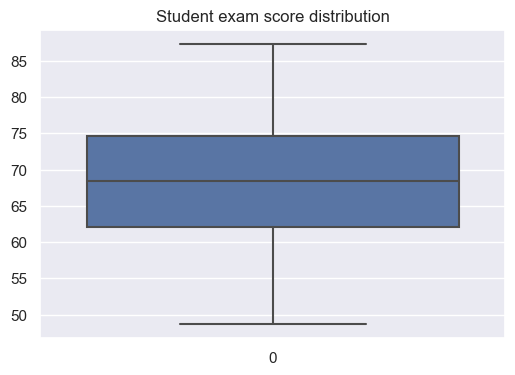

In [8]:
plt.figure(figsize=(6,4)) # Setting the plot size
sns.boxplot(data= df['exam_score'])
plt.title("Student exam score distribution")
plt.show()

C:\Users\timay\AppData\Local\Temp\ipykernel_51768\3570274249.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["exam_score"], kde= True)


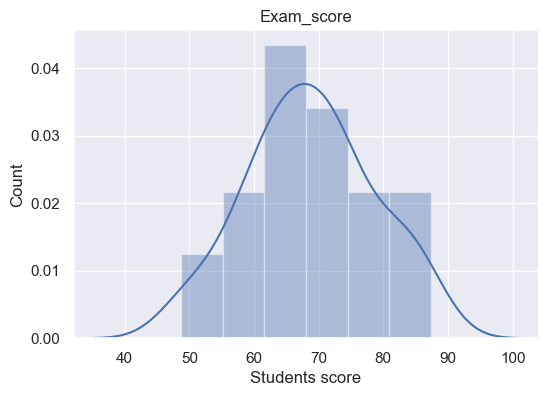

In [9]:
plt.figure(figsize=(6,4))
sns.distplot(df["exam_score"], kde= True)
plt.xlabel("Students score")
plt.ylabel("Count")
plt.title("Exam_score")
plt.show()

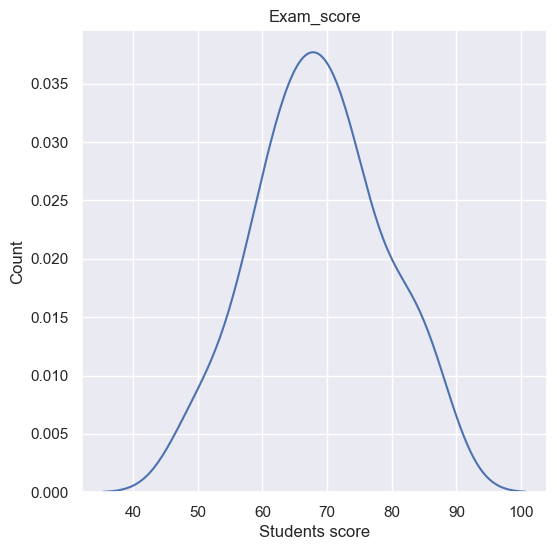

In [10]:
plt.figure(figsize=(6,6))
sns.kdeplot(df["exam_score"])
plt.xlabel("Students score")
plt.ylabel("Count")
plt.title("Exam_score")
plt.show()

## Question 1b
 One of the teachers is concerned about the performance of the students in the school. She 
suspects that their performance may be below the reported national average of 70%. Does 
the data show that her concerns are justified? Use a significance level of alpha = 0.05.

### Parameters:
1. Sample size(n)= 50
2. sample Mean: 68.735600
3. Standard deviation: 9.750143
4. Null-Hypotesis(H0): >= 70%
5. Alternate-Hypothesis(Ha): < 70%
6. alpha = 0.05

###### Hypotesis question: 
Do we have enough evidence to support the teachers H0 the some students score less than 70%?

## Answer rationeal:
#### Tail test?
This is a Left tail test because we are trying to determin if the sudents average is below the national average of 70%. i.e the alternate hypotesis is less than the null-hypotesis.
#### Type of test method: 
Given the sample size is 50 and we have a known sample standard deviation, we are goin to use the Z-test.   
#### Formular:
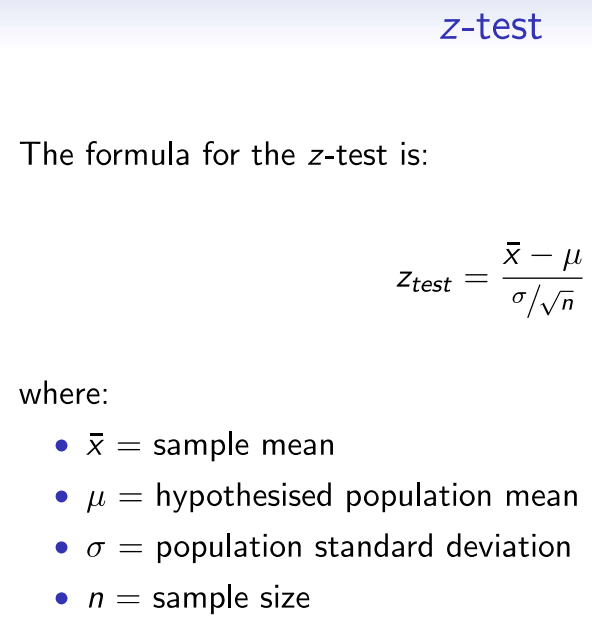

In [11]:
from scipy import stats
import math as mt
import scipy.stats as stats

In [12]:
stats.ttest_1samp(df, popmean=70)

TtestResult(statistic=array([-0.91697714]), pvalue=array([0.36364597]), df=array([49]))

## Checking manually

In [13]:
# Define parameters for the test (population mean and standard deviation)
population_mean = 70 # Replace this with the expected population mean
#sample = data
sample_mean = 68.735600
sample_std = 9.750143

# Number of observations in the sample
n = 50

# Calculate the Z-score
#z_score = (sample_mean - population_mean) / (sample_std / mt.sqrt(n))
#(xbar-mu)/(s/math.sqrt(n)))

# Calculate the p-value

#p_value = stats.norm.cdf(z_score)  # confirm if this is correct

# Print Z-score and p-value

print("Test statistic:",(sample_mean-population_mean)/(sample_std/mt.sqrt(n)))

#print(f"P-value: {p_value}")

Test statistic: -0.9169771295992962


# Conclusion:

At 95% confidence interval, and 0.05 alpha, we fail to reject the null hypothesis. This is becasuse the value of p-value(***write p vlue***) is not less than the alpha value (0.05). 

This in conclusion suggests that we have not foul enough evidence to substantiate the teaches clain of a less national average score for the student exam result. This howeve does not validat or confirmn that the student actually average above or at least the meanimum national average. 

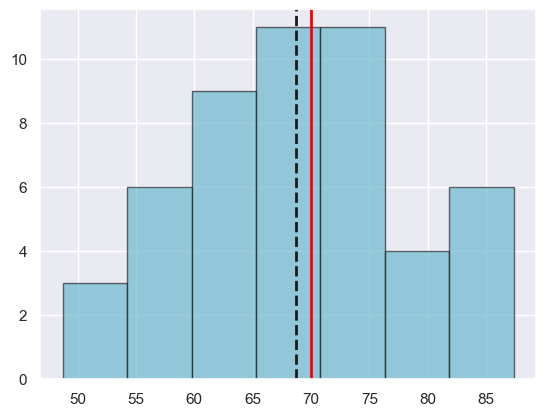

In [14]:
result = plt.hist(df, bins=7, color = "c", edgecolor = "k", alpha =0.65) # parameters for thr histograme
# add inthe popmean and mu to see how far off thr mean is the predicted value is 
plt.axvline(sample_mean, color = "k", linestyle ="dashed", linewidth = 2)
plt.axvline(population_mean, color="red",linestyle ="solid", linewidth = 2)

The read line indicate wehre thr nation average is and the broken line represent he studet average. Contrary to what our test suggest but thsi evedent is not substantial enough to reject null hypothesis. It is how ever visually clear that null hypotheses is not accurate either.

In [15]:
stats.ttest_1samp(df, popmean=70)
# chech if this is correct 

TtestResult(statistic=array([-0.91697714]), pvalue=array([0.36364597]), df=array([49]))

# Qestion 2: 
Load the diamonds dataset, and print the first 5 rows. 

2. The color variable refers to the colour of the diamond, with categories from “D” to “J”. Colourless diamonds are considered better than diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).

3. Create a new binary variable in the dataframe called “colourless” which records 1 in rows with colourless diamonds and 0 otherwise.
4. Perform an appropriate hypothesis test to determine whether there is any association between the clarity of a diamond and whether it is colourless or not. Use a significance level of alpha = 0.01.
5. Produce and comment on an appropriate plot to illustrate your findings. 
6. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds and the mean price of non-colourless diamonds.

## Loading dataset

In [16]:
diamond=sns.load_dataset('diamonds')

## Print first five rows

In [17]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


As shown above, diamonds dataset was loaded usinf seaborn liabrary, and assigned to the variablke diamonds. The '.head()' method in pandas was used to print the first five rows of diamonds datafarme.  

### EDA

In [18]:
diamond.shape

(53940, 10)

In [19]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [20]:
diamond.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Length: 53940, dtype: bool

In [21]:
diamond.duplicated().sum()

146

## Five number summary

In [22]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Explain the number summary!

2. The color variable refers to the colour of the diamond, with categories from “D” to “J”. Colourless diamonds are considered better than diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).
3. Create a new binary variable in the dataframe called “colourless” which records 1 in rows with colourless diamonds and 0 otherwise.

In [23]:
dia = diamond

In [24]:
dia['color'].unique().tolist

<bound method ExtensionArray.tolist of ['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']>

In [25]:
colourless= ['D', 'E', 'F']

In [26]:
taint= ['G', 'H', 'I', 'J']

In [27]:
def get_color(x):
    if (x in colourless):
        return 1
    else:
        return 0

In [28]:
dia['colourless']= dia['color'].apply(get_color)

In [29]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,colourless
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [30]:
dia['colourless'].unique()

array([1, 0], dtype=int64)

4. Perform an appropriate hypothesis test to determine whether there is any association between the clarity of a diamond and whether it is colourless or not. Use a significance level of alpha = 0.01.
5. Produce and comment on an appropriate plot to illustrate your findings. 
6. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds and the mean price of non-colourless diamonds.

In [31]:
dia['clarity'].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

## Understanding question 2.
#### Question:
4. Perform an appropriate hypothesis test to determine whether there is any association between the clarity of a diamond and whether it is colourless or not. Use a significance level of alpha = 0.01.
##### Personal interpretation:
The question is asking us to perform a hypothesis testing on 2 variables, that in our diamond dataset happens to be categorical. 
***Categorical variables:*** They are variables that categories observations into diffrent categories/group/class. 
In the question there are two categories in veiw;
1. Clarity: The clarity column is a categorical varible that groups diamonds into diffrent categories presumably by their properties. A little exploration of the clarity variable using 'unique()' return that there are 8 uniqe categories in it namely ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']. 
2. Colourless: The colourless column was enginereed in question 2.c. It has 2 categories in it. Category 1 are those diamonds that are colourless, and category 0 are those diamods that have some colour. 

Bringing it all together, question 4 wants us to perform an hypothesis to check if there is any relationship or corrolation between the clarity of a diamond, anfd weather it is going to be colourless or colourful. 

##### Approach
To do this we would be using the 'Chi-Square-Test of independence'. According to (Zach, 2020), the 'Chi-Square-Test of independence' is an omnibus test used to determine whether or not there is a significant association between two categorical variables.

#### methodology (PYTHON FOR DATA SCIENCE, 2020
Th Normal hypothesis testing steps is would be used:
#### Define hypothesis
1. Null-Hypothesis (H0): Clarity and colorless variables are independent. There is no association between them. 
2. Alternate-HYpothesis(Ha): Clarity and colorless variables are not independent. There is association between them. 
#### Formular
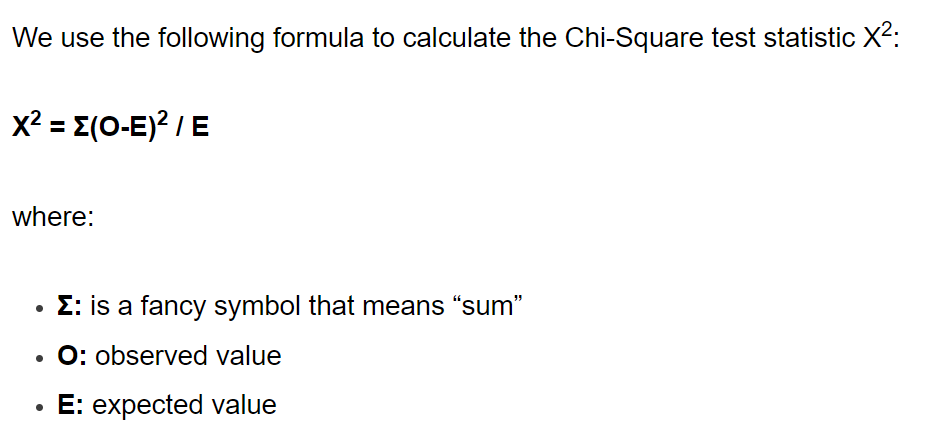

***Expected value = (row sum * column sum) / table sum.***
3. Calculate summary table
4. Calculate the crosstab df
5. Calculate Chi-square-Test of independence
6. Make conclusion


In [32]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   carat       53940 non-null  float64 
 1   cut         53940 non-null  category
 2   color       53940 non-null  category
 3   clarity     53940 non-null  category
 4   depth       53940 non-null  float64 
 5   table       53940 non-null  float64 
 6   price       53940 non-null  int64   
 7   x           53940 non-null  float64 
 8   y           53940 non-null  float64 
 9   z           53940 non-null  float64 
 10  colourless  53940 non-null  int64   
dtypes: category(3), float64(6), int64(2)
memory usage: 3.4 MB


In [33]:
dia['colourless']= dia['colourless'].astype('category')

In [34]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   carat       53940 non-null  float64 
 1   cut         53940 non-null  category
 2   color       53940 non-null  category
 3   clarity     53940 non-null  category
 4   depth       53940 non-null  float64 
 5   table       53940 non-null  float64 
 6   price       53940 non-null  int64   
 7   x           53940 non-null  float64 
 8   y           53940 non-null  float64 
 9   z           53940 non-null  float64 
 10  colourless  53940 non-null  category
dtypes: category(4), float64(6), int64(1)
memory usage: 3.1 MB


## Univarate analysis 

In [35]:
pip install researchpy

In [36]:
import researchpy as rp
rp.summary_cat(dia[["clarity", "colourless"]])

C:\Users\timay\anaconda3\Lib\site-packages\researchpy\summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,clarity,SI1,13065,24.22
1,,VS2,12258,22.73
2,,SI2,9194,17.04
3,,VS1,8171,15.15
4,,VVS2,5066,9.39
5,,VVS1,3655,6.78
6,,IF,1790,3.32
7,,I1,741,1.37
8,colourless,0,27826,51.59
9,,1,26114,48.41


### Summary table (code-mentor.ai, 2023)
The code "rp.summary_cat(df[["clarity", "colorless"]])" was used to generate a summary table of the clarity and colorless categorical variables.  
The "rp.summary_cat()" function is part of the researchpy library, which provides various statistical functions for data analysis in Python. I used it to calculates the frequency and relative frequency of each unique value in clarity and colorless variables.
The output of this operation as shown in ***fig.*** is a summary table that displays the count of unique values in each variable, and the percentage they account for in the entire sample population. It was useful to have this summary table to understand the distribution and characteristics of clarity and colorless variables (code-mentor.ai, 2023). 

In [37]:
C_t = pd.crosstab(dia["clarity"], dia["colourless"])
C_t

colourless,0,1
clarity,,
IF,1174,616
VVS1,2013,1642
VVS2,2547,2519
VS1,4821,3350
VS2,5890,6368
SI1,6425,6640
SI2,4502,4692
I1,454,287


## Creating Contigency table. 

The code "pd.crosstab(dia["clarity"], dia["colourless"])" utilises "pd.crosstab()" function from the pandas library to create a contigency table.

A contingency table, also known as a cross-tabulation, is a table that displays the frequency distribution of the "clarity" and "colorless" variables.

"The pd.crosstab() function takes two arguments: the first argument is the column from the DataFrame that will be displayed as the rows in the table (in this case, the "region" column), and the second argument is the column that will be displayed as the columns in the table (in this case, the "agecat" column)" (code-mentor.ai, 2023).

The result of the operation "C_t" is a DataFrame object that represents the cross-tabulation table of the two categorical variable clarity and colorless. Each cell in the table contains the count of occurrences where a specific combination of "clarity" and "colorless" values occurs in the original DataFrame dia. (code-mentor.ai, 2023)

## Perform Chi - test

In [38]:
stats.chi2_contingency(C_t)

Chi2ContingencyResult(statistic=486.4730594148522, pvalue=6.4815871244549e-101, dof=7, expected_freq=array([[ 923.40637746,  866.59362254],
       [1885.50296626, 1769.49703374],
       [2613.39480905, 2452.60519095],
       [4215.16955877, 3955.83044123],
       [6323.52814238, 5934.47185762],
       [6739.83481646, 6325.16518354],
       [4742.90404153, 4451.09595847],
       [ 382.2592881 ,  358.7407119 ]]))

## Interpreting results

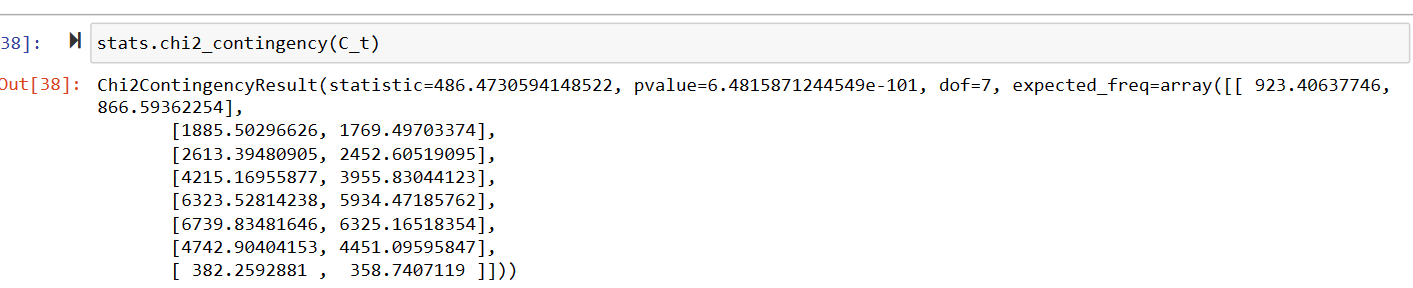
fig.?
Show in ***fig.*** is the result of chi-square test of independence performed on 'clarity' and 'colorless' variables from dia df. 
The result has the followiung components in it: 
1. Chi-Square Test Statistics
2. P-value
3. Degrees of Freedom (dof)
4. Expected Frequencies (expected_freq)

#### Chi-Square Test Statistics:
The chi-square statistic result, measures the level of discrepancy between the observed and expected frequencies. Our output show the the computed chi-square statistic is ≈486.47.

#### P-value:
The p-value result in this operation, indicates the probability of observing such an extreme (or more extreme) result if the variables were independent i.e null hypothesis is true. Here, the p-value is ≈6.48e-101(0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000064815871244549) as displayed it is a very small number close to zero.

#### Degrees of Freedom:
Degrees of freedom often denoted as dof in our result indecate how many number in the grid (contigency table) are acuattly independent. It is equal to "the number of rows minus one times the number of columns minus one: that is, (R-1)*(C-1)"(Ling 300, 2008). Here, the degrees of freedom is 7.

#### Expected Frequencies:
"The expected frequencies under the assumption of independence between the variables. These are the frequencies that would be expected in each cell of the contingency table if there were no association between the two variables. They are calculated based on the marginal totals and sample size. The array represents the expected frequencies for each combination of the two categorical variables"(code-mentor.ai, 2023)

### Implication of result:
Based on result, we have strong evidence to reject the Null-Hypoothesis, this is because our pvalue is close to zero, can smaller than the alpha which is  0.01. This means in context that there is strong eveidence against 'clarity' and 'colorless' variables being independent. There is some sort of dependency between the two categorical varible based on our result. 
Hence we reject the Null-Hypothesis, and accept the 'Altanate-hypothesis'. There seems to be a statistically significant association or relationship between these variables.

# Plot Question 2

Since we are looking to visualiuse the relationship between two categorical variable, we can use count plot to visialise how each unique value of clarity is related to clolorless categories.

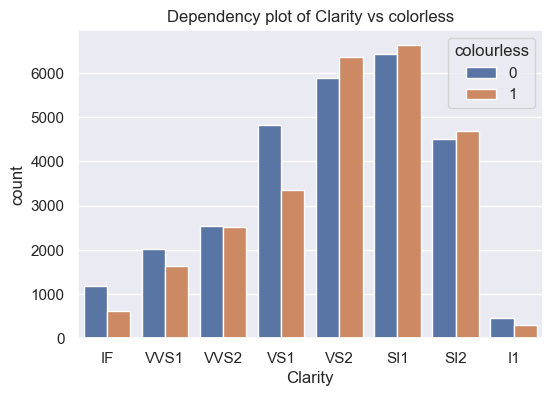

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(data=dia, x='clarity', hue='colourless')
plt.xlabel('Clarity')
plt.ylabel('count')
plt.title("Dependency plot of Clarity vs colorless")
plt.show()

## Calculating confidence interval last question 

# Question 3 
Load the PlantGrowth dataset from the pydataset library. It contains the results of a small study 
comparing the yields of plants obtained under a control and under two different treatment 
conditions.
1. Find and comment on important summary statistics by treatment and produce an 
appropriate plot to summarise the dataset.
2. Conduct an appropriate hypothesis test to see if there is evidence of a difference between 
the three means (that is, the control and the two treatments). Use a significance level of 
alpha = 0.05. 
3. If there is evidence of a difference between the three means, find and comment on where 
this difference may be.

In [59]:
#from dataset import Dataset
import pydataset 
plant = pydataset.data('PlantGrowth')

In [60]:
plant.head()

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


In [61]:
plant.shape

(30, 2)

In [62]:
plant.isnull().sum()

weight    0
group     0
dtype: int64

In [65]:
plant.duplicated().sum()

0

In [69]:
plant.dtypes

weight    float64
group      object
dtype: object

In [66]:
plant.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [67]:
plant['group'].unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

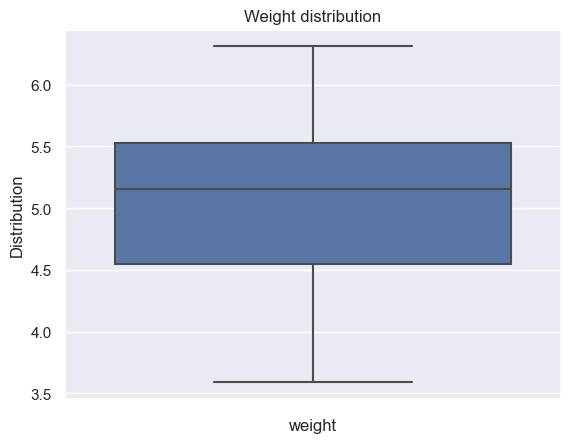

In [79]:
# looking for outliers use bok plot 
#plt.figure(figsize=(8,6)) 
sns.boxplot(y=plant["weight"])# This code utilises seaborn to plot a box plot of weight
plt.xlabel('weight')
plt.ylabel('Distribution')
plt.title("Weight distribution")# This defines the title of the boxplot
plt.show()

C:\Users\timay\AppData\Local\Temp\ipykernel_51768\3663226261.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(plant["weight"], kde= True)# This code utilises seaborn to plot a box plot of weight


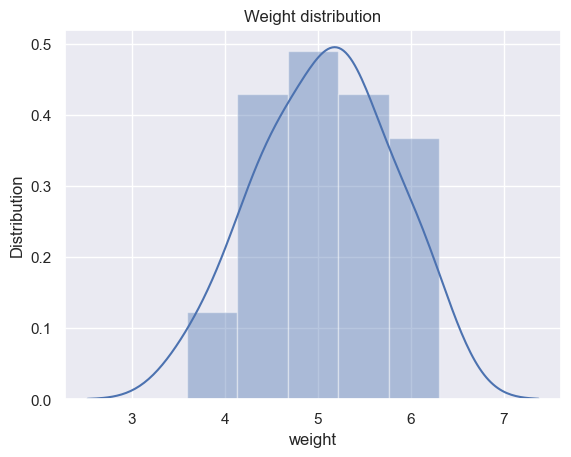

In [83]:
# looking for outliers use bok plot 
#plt.figure(figsize=(6,4)) 
sns.distplot(plant["weight"], kde= True)# This code utilises seaborn to plot a box plot of weight
plt.xlabel('weight')
plt.ylabel('Distribution')
plt.title("Weight distribution")# This defines the title of the boxplot
plt.show()

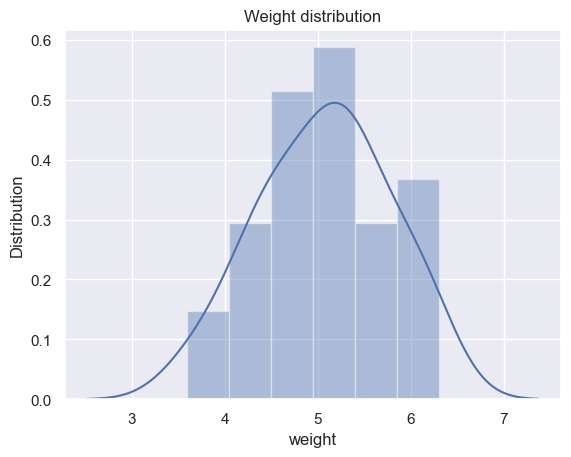

In [92]:
sns.histplot(
    plant["weight"], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)
plt.ylabel('Distribution')
plt.title("Weight distribution")
plt.xlabel('weight')
plt.show()

2. Conduct an appropriate hypothesis test to see if there is evidence of a difference between 
the three means (that is, the control and the two treatments). Use a significance level of 
alpha = 0.05. 